In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model

from helpers import *

sys.path.append(os.path.abspath("../"))
from pax_utils import s1s2_utils



Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################

file_all       = "../pax_merge/merged/merged_all_1803031449.pkl"

df_all         = pd.read_pickle(file_all)
df_all         = df_all[df_all['intr_count'] == 1].reset_index(drop=True)
df_train_truth = df_all[:][['x', 'y']]
df_train_input = df_all[:][s1s2_utils.getS2integralsDataFrameColumns()]


####################################################################################################
####################################################################################################

#checkTrainingData(df_train_input, df_train_truth)



In [3]:

####################################################################################################
####################################################################################################

folder         = "models" + "/"    
model_name     = "model_barge_elu"
model_name     = "model_xenon1t_elu"
model_name_h5  = folder + model_name + ".h5"
model_name_png = folder + model_name + ".png"



In [4]:

####################################################################################################
####################################################################################################

model       = load_model(model_name_h5)
arr_xy_pred = model.predict(df_train_input)

print("\nLoaded Model: " + model_name_h5)
print("Predicted\n")




Loaded Model: models/model_xenon1t_elu.h5
Predicted



In [6]:

####################################################################################################
####################################################################################################

arr_x_true = df_train_truth[:]['x'].as_matrix()
arr_y_true = df_train_truth[:]['y'].as_matrix()

arr_x_pred = arr_xy_pred[:, 0]
arr_y_pred = arr_xy_pred[:, 1]

arr_dx     = arr_x_true - arr_x_pred
arr_dy     = arr_y_true - arr_y_pred



In [17]:

####################################################################################################
####################################################################################################

file_out         = "./pkl/test.pkl"

cols_out         = ['event_number', 'x', 'y', 'intr_x', 'intr_y', 'intr_x_nn', 'intr_y_nn']

df_out           = df_all[:][cols_out]
df_out['x_pred'] = arr_x_pred
df_out['y_pred'] = arr_y_pred


df_out.to_pickle(file_out)


####################################################################################################
####################################################################################################

df_test = pd.read_pickle(file_out)

display(df_test[0:5][:])
print()



,event_number,x,y,intr_x,intr_y,intr_x_nn,intr_y_nn,x_pred,y_pred
0,1,2.626434,-17.960824,3.117168,-16.583333,3.270800,-16.607226,3.858828,-18.150707
1,3,10.907536,-6.312277,9.850251,-5.610902,9.921544,-5.569570,10.961799,-6.187883
2,5,24.631697,-12.763601,24.563283,-12.343985,24.643193,-12.371619,25.968349,-13.918870
3,6,2.726006,37.749081,2.119674,34.039474,2.042468,33.434272,1.612665,36.465977
4,8,-18.078293,-23.212466,-16.583333,-20.822682,-16.423884,-21.070236,-17.852966,-21.908081


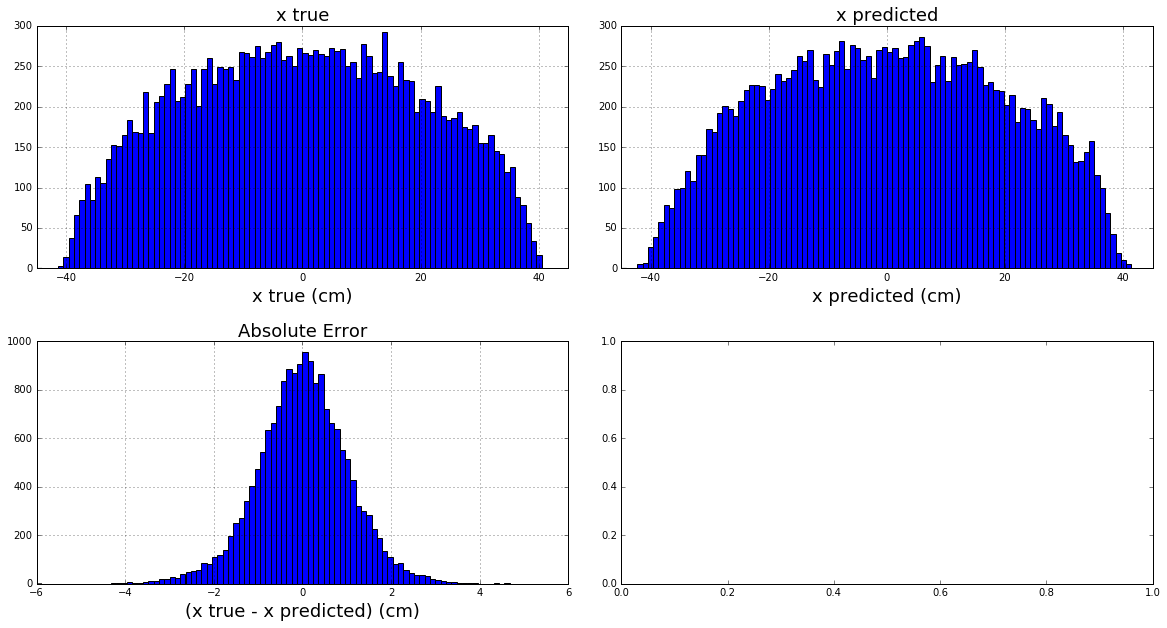

In [7]:

####################################################################################################
####################################################################################################

rows = 2
cols = 2

nbins = 100
x_min = -45
x_max = 45

dx_min = -6
dx_max =  6

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

plt.subplot(rows, cols, 1)
plt.hist(arr_x_true, bins=nbins, range=[x_min, x_max])
plt.xlim([x_min, x_max])
plt.xlabel('x true (cm)', fontsize=18)
plt.title('x true', fontsize=18)
plt.grid(True)

plt.subplot(rows, cols, 2)
plt.hist(arr_x_pred, bins=nbins, range=[x_min, x_max])
plt.xlim([x_min, x_max])
plt.xlabel('x predicted (cm)', fontsize=18)
plt.title('x predicted', fontsize=18)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(arr_dx, bins=nbins, range=[dx_min, dx_max])
plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
plt.title('Absolute Error', fontsize=18)
plt.grid(True)

#plt.subplot(2, 2, 4)
#plt.hist(np.absolute(arr_dx))
#plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
#plt.title('Absolute Value Error', fontsize=18)
#plt.grid(True)

#plt.savefig("plots/xy_errors.png")


In [24]:

print("std : " + str(np.std (arr_dx)) + " cm")
print("mean: " + str(np.mean(arr_dx)) + " cm")



std : 1.03073005623 cm
mean: 0.00778452329236 cm


In [25]:

####################################################################################################
# 1) 1k events linear 127-100-100-40-40-20-20-2   STD ~ 19 cm
####################################################################################################

x_err_abs_mean = np.mean(arr_dx)
x_err_abs_max  = np.amax(arr_dx)
x_err_abs_std  = np.std(arr_dx)

y_err_abs_mean = np.mean(arr_dy)
y_err_abs_max  = np.amax(arr_dy)
y_err_abs_std  = np.std(arr_dy)

print()
print("X Error STD (cm): " + str(x_err_abs_std))
print("Y Error STD (cm): " + str(y_err_abs_std))
print()
print("X Error Max (cm): " + str(x_err_abs_max))
print("Y Error Max (cm): " + str(y_err_abs_max))
print()
print("X Error Mean (cm): " + str(x_err_abs_mean) )
print("Y Error Mean (cm): " + str(y_err_abs_mean))
print()




X Error STD (cm): 1.03073005623
Y Error STD (cm): 1.13417521734

X Error Max (cm): 4.67706810369
Y Error Max (cm): 7.0098039195

X Error Mean (cm): 0.00778452329236
Y Error Mean (cm): -0.119485326889

